In [14]:
include("helper.jl")
include("algorithms.jl")
using NPZ
using MultivariateStats

# For autoreload file
#using Revise
#import helper

In [15]:
Threads.nthreads()

6

# Metropolis

## Overlap over time

In [4]:
# Define function to compute nb_iter in function of N
f(N) = ceil(Int64, 11 * N * log(N))

f (generic function with 1 method)

In [57]:
@time begin

    nb_iter = f(5000) + 10000
    nb_exp = 100
    
    a = 5.9
    b = 0.1

    # Run for N=100
    N = 100
    x_star = generate_x(N)
    overlap_hat_metropolis_100 = run_experiment(N, a, b,
        metropolis, nb_iter, nb_exp)
    
    # Run for N=500
    N = 500
    x_star = generate_x(N)
    overlap_hat_metropolis_500 = run_experiment(N, a, b,
        metropolis, nb_iter, nb_exp)
    
    # Run for N=1000
    N = 1000
    x_star = generate_x(N)
    overlap_hat_metropolis_1000 = run_experiment(N, a, b,
        metropolis, nb_iter, nb_exp)
    
    # Run for N=5000
    N = 5000
    x_star = generate_x(N)
    overlap_hat_metropolis_5000 = run_experiment(N, a, b,
        metropolis, nb_iter, nb_exp)
end

4016.053283 seconds (4.61 G allocations: 10.918 TiB, 10.95% gc time, 0.01% compilation time)


1×648790 Matrix{Float64}:
 0.011776  0.011736  0.0117  0.011708  …  0.853976  0.853964  0.853964

In [58]:
# Save results
npzwrite("data/overlap_hat_metropolis_100.npy", overlap_hat_metropolis_100)
npzwrite("data/overlap_hat_metropolis_500.npy", overlap_hat_metropolis_500)
npzwrite("data/overlap_hat_metropolis_1000.npy", overlap_hat_metropolis_1000)
npzwrite("data/overlap_hat_metropolis_5000.npy", overlap_hat_metropolis_5000)

In [65]:
# Vertical lines at 
Ns = Vector{Int64}([100, 500, 1000, 5000])
x_vlines = f.(Ns)

visualize_overlap(overlap_hat_metropolis_100[1, :],
    overlap_hat_metropolis_500[1, :],
    overlap_hat_metropolis_1000[1, :],
    overlap_hat_metropolis_5000[1, :],
    nb_exp, x_vlines, a, b)

# Save figure
savefig("figures/overlap_metropolis.png")

In [7]:
@time begin
    
    nb_iter = 60000
    nb_exp = 100
    
    a = 5.9
    b = 0.1
    N = 700
    x_star = generate_x(N)
    overlap_hat_metropolis_700 = run_experiment(N, a, b, x_star,
        metropolis, nb_iter, nb_exp)
    
    npzwrite("data/overlap_hat_metropolis_700.npy", overlap_hat_metropolis_700)
end

 31.651617 seconds (69.26 M allocations: 103.355 GiB, 12.14% gc time, 3.59% compilation time)


## Overlap wrt r

In [7]:
@time begin
    
    nb_exp = 100
    d = 3
    nb_r = 10
    
    N = 100
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_metropolis_100, range_r_100 = overlap_r(x_star, metropolis, N, nb_iter, nb_exp, d, 0, nb_r)
    print("End of N=100")
    N = 500
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_metropolis_500, range_r_500 = overlap_r(x_star, metropolis, N, nb_iter, nb_exp, d, 0, nb_r)
    print("End of N=500")
    N = 1000
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_metropolis_1000, range_r_1000 = overlap_r(x_star, metropolis, N, nb_iter, nb_exp, d, 0, nb_r)
    print("End of N=1000")
    N = 5000
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_metropolis_5000, range_r_5000 = overlap_r(x_star, metropolis, N, nb_iter, nb_exp, d, 0, nb_r)
end

End of N=100End of N=500End of N=1000

LoadError: TaskFailedException

[91m    nested task error: [39mInterruptException:
    Stacktrace:
      [1] [0m[1mArray[22m
    [90m    @ [39m[90m./[39m[90m[4mboot.jl:457[24m[39m[90m [inlined][39m
      [2] [0m[1mArray[22m
    [90m    @ [39m[90m./[39m[90m[4mboot.jl:466[24m[39m[90m [inlined][39m
      [3] [0m[1mArray[22m
    [90m    @ [39m[90m./[39m[90m[4mboot.jl:474[24m[39m[90m [inlined][39m
      [4] [0m[1msimilar[22m
    [90m    @ [39m[90m./[39m[90m[4mabstractarray.jl:829[24m[39m[90m [inlined][39m
      [5] [0m[1msimilar[22m
    [90m    @ [39m[90m./[39m[90m[4mabstractarray.jl:828[24m[39m[90m [inlined][39m
      [6] [0m[1msimilar[22m
    [90m    @ [39m[90m./[39m[90m[4mbroadcast.jl:212[24m[39m[90m [inlined][39m
      [7] [0m[1msimilar[22m
    [90m    @ [39m[90m./[39m[90m[4mbroadcast.jl:211[24m[39m[90m [inlined][39m
      [8] [0m[1mcopy[22m
    [90m    @ [39m[90m./[39m[90m[4mbroadcast.jl:885[24m[39m[90m [inlined][39m
      [9] [0m[1mmaterialize[22m
    [90m    @ [39m[90m./[39m[90m[4mbroadcast.jl:860[24m[39m[90m [inlined][39m
     [10] [0m[1mget_h_row[22m
    [90m    @ [39m[90m~/MA1/mcaa/github/MCAAProject/mcaa_julia/[39m[90m[4malgorithms.jl:13[24m[39m[90m [inlined][39m
     [11] [0m[1mcompute_acceptance_proba[22m[0m[1m([22m[90mx[39m::[0mVector[90m{Int8}[39m, [90mv[39m::[0mInt64, [90mn[39m::[0mInt64, [90madj[39m::[0mBitMatrix, [90ma[39m::[0mFloat64, [90mb[39m::[0mFloat64[0m[1m)[22m
    [90m    @ [39m[35mMain[39m [90m~/MA1/mcaa/github/MCAAProject/mcaa_julia/[39m[90m[4malgorithms.jl:22[24m[39m
     [12] [0m[1mmetropolis_step![22m
    [90m    @ [39m[90m~/MA1/mcaa/github/MCAAProject/mcaa_julia/[39m[90m[4malgorithms.jl:30[24m[39m[90m [inlined][39m
     [13] [0m[1mmetropolis[22m[0m[1m([22m[90madj[39m::[0mBitMatrix, [90ma[39m::[0mFloat64, [90mb[39m::[0mFloat64, [90mnb[39m::[0mInt64, [90mnb_iter[39m::[0mInt64, [90mx_star[39m::[0mVector[90m{Int8}[39m, [90marg[39m::[0mInt64[0m[1m)[22m
    [90m    @ [39m[35mMain[39m [90m~/MA1/mcaa/github/MCAAProject/mcaa_julia/[39m[90m[4malgorithms.jl:43[24m[39m
     [14] [0m[1mmacro expansion[22m
    [90m    @ [39m[90m~/MA1/mcaa/github/MCAAProject/mcaa_julia/[39m[90m[4malgorithms.jl:173[24m[39m[90m [inlined][39m
     [15] [0m[1m(::var"#146#threadsfor_fun#8"{Int64, Float64, Float64, Vector{Int8}, typeof(metropolis), Int64, Int64, Matrix{Float64}, UnitRange{Int64}})[22m[0m[1m([22m[90monethread[39m::[0mBool[0m[1m)[22m
    [90m    @ [39m[35mMain[39m [90m./[39m[90m[4mthreadingconstructs.jl:85[24m[39m
     [16] [0m[1m#invokelatest#2[22m
    [90m    @ [39m[90m./[39m[90m[4messentials.jl:716[24m[39m[90m [inlined][39m
     [17] [0m[1minvokelatest[22m
    [90m    @ [39m[90m./[39m[90m[4messentials.jl:714[24m[39m[90m [inlined][39m
     [18] [0m[1mmacro expansion[22m
    [90m    @ [39m[90m./[39m[90m[4mthreadingconstructs.jl:90[24m[39m[90m [inlined][39m
     [19] [0m[1mrun_experiment[22m[0m[1m([22m[90mnb[39m::[0mInt64, [90ma[39m::[0mFloat64, [90mb[39m::[0mFloat64, [90mx_star[39m::[0mVector[90m{Int8}[39m, [90malgorithm[39m::[0mtypeof(metropolis), [90mnb_iter[39m::[0mInt64, [90mnb_exp[39m::[0mInt64, [90mn0[39m::[0mInt64[0m[1m)[22m
    [90m    @ [39m[35mMain[39m [90m~/MA1/mcaa/github/MCAAProject/mcaa_julia/[39m[90m[4malgorithms.jl:168[24m[39m
     [20] [0m[1mmacro expansion[22m
    [90m    @ [39m[90m~/MA1/mcaa/github/MCAAProject/mcaa_julia/[39m[90m[4malgorithms.jl:201[24m[39m[90m [inlined][39m
     [21] [0m[1m(::var"#177#threadsfor_fun#10"{Vector{Int8}, typeof(metropolis), Int64, Int64, Int64, Int64, Int64, Vector{Float64}, Vector{Float64}, UnitRange{Int64}})[22m[0m[1m([22m[90monethread[39m::[0mBool[0m[1m)[22m
    [90m    @ [39m[35mMain[39m [90m./[39m[90m[4mthreadingconstructs.jl:85[24m[39m
     [22] [0m[1m(::var"#177#threadsfor_fun#10"{Vector{Int8}, typeof(metropolis), Int64, Int64, Int64, Int64, Int64, Vector{Float64}, Vector{Float64}, UnitRange{Int64}})[22m[0m[1m([22m[0m[1m)[22m
    [90m    @ [39m[35mMain[39m [90m./[39m[90m[4mthreadingconstructs.jl:52[24m[39m

In [8]:
# Save results
npzwrite("data/overlap_r_vector_metropolis_100.npy", overlap_r_vector_metropolis_100)
npzwrite("data/overlap_r_vector_metropolis_500.npy", overlap_r_vector_metropolis_500)
npzwrite("data/overlap_r_vector_metropolis_1000.npy", overlap_r_vector_metropolis_1000)
npzwrite("data/overlap_r_vector_metropolis_5000.npy", overlap_r_vector_metropolis_5000)

LoadError: UndefVarError: overlap_r_vector_metropolis_5000 not defined

In [ ]:
plot_overlap_r(
    overlap_r_vector_metropolis_100[1, :],
    overlap_r_vector_metropolis_500[1, :],
    overlap_r_vector_metropolis_700[1, :],
    overlap_r_vector_metropolis_1000[1, :],
    range_r_100, d)

savefig("figures/overlap_r_metropolis.png")

# Houdayer

## Overlap over time

In [15]:
@time begin

    
    nb_iter = 80000
    nb_exp = 100
    a = 5.9
    b = 0.1

    N = 100
    x_star = generate_x(N)
    overlap_hat_houdayer_100 = run_experiment(N, a, b,
        houdayer, nb_iter, nb_exp)
    
    N = 400
    x_star = generate_x(N)
    overlap_hat_houdayer_400 = run_experiment(N, a, b,
        houdayer, nb_iter, nb_exp)
    
    N = 700
    x_star = generate_x(N)
    overlap_hat_houdayer_700 = run_experiment(N, a, b,
        houdayer, nb_iter, nb_exp)
    
    N = 1000
    x_star = generate_x(N)
    overlap_hat_houdayer_1000 = run_experiment(N, a, b,
        houdayer, nb_iter, nb_exp)
end

LoadError: TaskFailedException

[91m    nested task error: [39mInterruptException:
    Stacktrace:
      [1] [0m[1mArray[22m
    [90m    @ [39m[90m./[39m[90m[4mboot.jl:457[24m[39m[90m [inlined][39m
      [2] [0m[1mBitMatrix[22m[0m[1m([22m::[0mUndefInitializer, ::[0mInt64, ::[0mInt64[0m[1m)[22m
    [90m    @ [39m[90mBase[39m [90m./[39m[90m[4mbitarray.jl:37[24m[39m
      [3] [0m[1mBitArray[22m
    [90m    @ [39m[90m./[39m[90m[4mbitarray.jl:71[24m[39m[90m [inlined][39m
      [4] [0m[1mfalses[22m
    [90m    @ [39m[90m./[39m[90m[4mbitarray.jl:405[24m[39m[90m [inlined][39m
      [5] [0m[1mcopy[22m
    [90m    @ [39m[90m~/julia-1.7.0/share/julia/stdlib/v1.7/LinearAlgebra/src/[39m[90m[4mbitarray.jl:239[24m[39m[90m [inlined][39m
      [6] [0m[1missymmetric[22m[0m[1m([22m[90mA[39m::[0mBitMatrix[0m[1m)[22m
    [90m    @ [39m[35mLinearAlgebra[39m [90m~/julia-1.7.0/share/julia/stdlib/v1.7/LinearAlgebra/src/[39m[90m[4mbitarray.jl:140[24m[39m
      [7] [0m[1mSimpleGraph{Int64}[22m[0m[1m([22m[90madjmx[39m::[0mBitMatrix[0m[1m)[22m
    [90m    @ [39m[36mGraphs.SimpleGraphs[39m [90m~/.julia/packages/Graphs/Mih78/src/SimpleGraphs/[39m[90m[4msimplegraph.jl:91[24m[39m
      [8] [0m[1mSimpleGraph[22m
    [90m    @ [39m[90m~/.julia/packages/Graphs/Mih78/src/SimpleGraphs/[39m[90m[4msimplegraph.jl:85[24m[39m[90m [inlined][39m
      [9] [0m[1mhoudayer_step[22m[0m[1m([22m[90mcur_x1[39m::[0mVector[90m{Int8}[39m, [90mcur_x2[39m::[0mVector[90m{Int8}[39m, [90madj[39m::[0mBitMatrix[0m[1m)[22m
    [90m    @ [39m[32mMain[39m [90m~/MA1/mcaa/github/MCAAProject/mcaa_julia/[39m[90m[4malgorithms.jl:81[24m[39m
     [10] [0m[1mhoudayer[22m[0m[1m([22m[90madj[39m::[0mBitMatrix, [90ma[39m::[0mFloat64, [90mb[39m::[0mFloat64, [90mnb[39m::[0mInt64, [90mnb_iter[39m::[0mInt64, [90mx_star[39m::[0mVector[90m{Int8}[39m, [90marg[39m::[0mInt64[0m[1m)[22m
    [90m    @ [39m[32mMain[39m [90m~/MA1/mcaa/github/MCAAProject/mcaa_julia/[39m[90m[4malgorithms.jl:104[24m[39m
     [11] [0m[1mmacro expansion[22m
    [90m    @ [39m[90m~/MA1/mcaa/github/MCAAProject/mcaa_julia/[39m[90m[4malgorithms.jl:150[24m[39m[90m [inlined][39m
     [12] [0m[1m(::var"#60#threadsfor_fun#3"{Int64, Float64, Float64, Vector{Int8}, typeof(houdayer), Int64, Int64, Matrix{Float64}, UnitRange{Int64}})[22m[0m[1m([22m[90monethread[39m::[0mBool[0m[1m)[22m
    [90m    @ [39m[32mMain[39m [90m./[39m[90m[4mthreadingconstructs.jl:85[24m[39m
     [13] [0m[1m(::var"#60#threadsfor_fun#3"{Int64, Float64, Float64, Vector{Int8}, typeof(houdayer), Int64, Int64, Matrix{Float64}, UnitRange{Int64}})[22m[0m[1m([22m[0m[1m)[22m
    [90m    @ [39m[32mMain[39m [90m./[39m[90m[4mthreadingconstructs.jl:52[24m[39m

In [43]:
Ns = Vector{Int64}([100, 300, 500, 700])
x_vlines = nb_iter = f.(Ns)
visualize_overlap(npzread("data/overlap_time_vector_houdayer_100.npy")[1, :],
    npzread("data/overlap_time_vector_houdayer_300.npy")[1, :],
    npzread("data/overlap_time_vector_houdayer_500.npy")[1, :],
    npzread("data/overlap_time_vector_houdayer_700.npy")[1, :],
    100, x_vlines, N, a, b)

# Save figure
savefig("figures/overlap_time_houdayer.png")

┌ Warning: no data to be written to data/overlap_time_vector_houdayer_100.npy. It might not be possible to read the file correctly.
└ @ NPZ /home/cpittet/.julia/packages/NPZ/UizJj/src/NPZ.jl:451


LoadError: MethodError: no method matching getindex(::Nothing, ::Int64, ::Colon)

## Overlap wrt r

In [51]:
@time begin

    nb_exp = 100
    d = 3
    nb_r = 10

    N = 100
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_houdayer_100, range_r_100 = overlap_r(x_star, houdayer, N, nb_iter, nb_exp, d)
    
    N = 400
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_houdayer_400, range_r_400 = overlap_r(x_star, houdayer, N, nb_iter, nb_exp, d)
    
    N = 700
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_houdayer_700, range_r_700 = overlap_r(x_star, houdayer, N, nb_iter, nb_exp, d)
    
    N = 1000
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_houdayer_1000, range_r_1000 = overlap_r(x_star, houdayer, N, nb_iter, nb_exp, d)
    
end

([0.5045, 0.47119999999999995, 0.4743999999999998, 0.4534, 0.4618, 0.4622000000000001, 0.4714999999999999, 0.4405000000000001, 0.4275999999999999, 0.4885  …  0.3803000000000001, 0.3777, 0.3057, 0.2873, 0.2584, 0.21280000000000002, 0.15459999999999996, 0.12989999999999996, 0.10570000000000002, 0.0817], [1.0e-10, 1.4773776525985098e-10, 2.1826447283974916e-10, 3.224590545296398e-10, 4.76393801040134e-10, 7.038135554931547e-10, 1.039798418481492e-9, 1.5361749466718297e-9, 2.2695105366946685e-9, 3.352924149249553e-9  …  0.02982471286216891, 0.04406236427773573, 0.0650967523045817, 0.09617248711152965, 0.14208308325339222, 0.20991037201085547, 0.3101168926574778, 0.45815976690544913, 0.6768750009458534, 1.0])

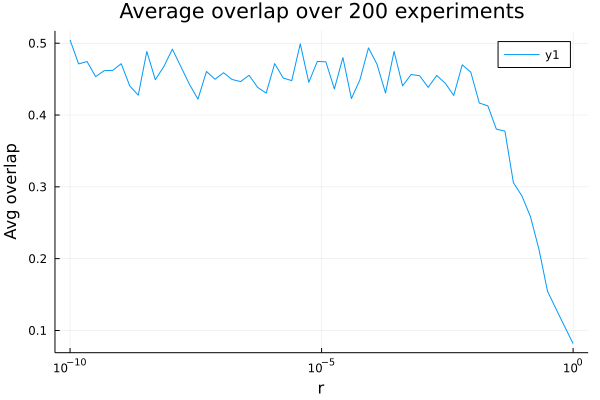

In [53]:
plot_overlap_r(
    overlap_r_vector_houdayer_100,
    overlap_r_vector_houdayer_400,
    overlap_r_vector_houdayer_700,
    overlap_r_vector_houdayer_1000,
    range_r_100, d)

savefig("figures/overlap_r_houdayer.png")

# Houdayer mixed

## Overlap wrt n0

In [5]:
@time begin
    
    N = 1000
    x_star = generate_x(N)
    nb_iter = f(N)
    nb_exp = 100
    a = 5.9
    b = 0.1
    
    n0 = 100
    overlap_hat_houdayer_mixed_100 = run_experiment(N, a, b,
        x_star, houdayer_mixed, nb_iter, nb_exp, n0)
    
    npzwrite("data/overlap_hat_houdayer_mixed_100.npy", overlap_hat_houdayer_mixed_100)

end

384.023725 seconds (400.10 M allocations: 1.325 TiB, 3.91% gc time, 0.77% compilation time)


In [6]:
@time begin
    
        n0 = 1000
    overlap_hat_houdayer_mixed_1000 = run_experiment(N, a, b,
        x_star, houdayer_mixed, nb_iter, nb_exp, n0)
    
    npzwrite("data/overlap_hat_houdayer_mixed_1000.npy", overlap_hat_houdayer_mixed_1000)
    
end

104.213325 seconds (217.03 M allocations: 566.919 GiB, 9.58% gc time)


In [ ]:
@time begin
        n0 = 5000
    overlap_hat_houdayer_mixed_5000 = run_experiment(N, a, b,
        x_star, houdayer_mixed, nb_iter, nb_exp, n0)
    
    npzwrite("data/overlap_hat_houdayer_mixed_5000.npy", overlap_hat_houdayer_mixed_5000)
end

In [ ]:
@time begin
    
    n0 = 10000
    overlap_hat_houdayer_mixed_10000 = run_experiment(N, a, b,
        x_star, houdayer_mixed, nb_iter, nb_exp, n0)
    
    npzwrite("data/overlap_hat_houdayer_mixed_10000.npy", overlap_hat_houdayer_mixed_10000)
end

In [ ]:
@time begin
        
    n0 = 20000
    overlap_hat_houdayer_mixed_20000 = run_experiment(N, a, b,
        x_star, houdayer_mixed, nb_iter, nb_exp, n0)
    
    npzwrite("data/overlap_hat_houdayer_mixed_20000.npy", overlap_hat_houdayer_mixed_20000)
    
end

In [5]:
overlap_hat_houdayer_mixed_100 = npzread("data/overlap_hat_houdayer_mixed_100.npy")
overlap_hat_houdayer_mixed_1000 = npzread("data/overlap_hat_houdayer_mixed_1000.npy")
overlap_hat_houdayer_mixed_5000 = npzread("data/overlap_hat_houdayer_mixed_5000.npy")
overlap_hat_houdayer_mixed_10000 = npzread("data/overlap_hat_houdayer_mixed_10000.npy")
overlap_hat_houdayer_mixed_20000 = npzread("data/overlap_hat_houdayer_mixed_20000.npy")
nb_exp = 100
a = 5.9
b = 0.1

Ns = Vector{Int64}([1000])
x_vlines = nb_iter = f.(Ns)
visualize_n0(
    overlap_hat_houdayer_mixed_100[1, :],
    overlap_hat_houdayer_mixed_1000[1, :],
    overlap_hat_houdayer_mixed_5000[1, :],
    overlap_hat_houdayer_mixed_10000[1, :],
    overlap_hat_houdayer_mixed_20000[1, :],
    nb_exp, x_vlines, a, b)

savefig("figures/overlap_n0_houdayer_mixed.png")

In [8]:
@time begin
    
    nb_iter = 60000
    nb_exp = 100
    n0 = 1000
    
    a = 5.9
    b = 0.1
    N = 700
    x_star = generate_x(N)
    overlap_hat_houdayer_mixed_700 = run_experiment(N, a, b, x_star,
        metropolis, nb_iter, nb_exp, n0)
    
    npzwrite("data/overlap_hat_houdayer_mixed_700.npy", overlap_hat_houdayer_mixed_700)
end

 27.039084 seconds (65.95 M allocations: 103.189 GiB, 12.70% gc time)


## Overlap over time

In [7]:
@time begin
    nb_iter = f(5000) + 10000
    nb_exp = 100
    a = 5.9
    b = 0.1
    n0 = 1000
    
    N = 100
    x_star = generate_x(N)
    overlap_hat_houdayer_mixed_100 = run_experiment(N, a, b,
        x_star, houdayer_mixed, nb_iter, nb_exp, n0)
    
    npzwrite("data/overlap_hat_houdayer_mixed_N100.npy", overlap_hat_houdayer_mixed_100)
end

237.744110 seconds (1.26 G allocations: 369.994 GiB, 54.62% gc time)


In [8]:
@time begin
    
    N = 500
    x_star = generate_x(N)
    overlap_hat_houdayer_mixed_500 = run_experiment(N, a, b,
        x_star, houdayer_mixed, nb_iter, nb_exp, n0)

    npzwrite("data/overlap_hat_houdayer_mixed_N500.npy", overlap_hat_houdayer_mixed_500)
end

337.922767 seconds (1.31 G allocations: 1.671 TiB, 16.16% gc time)


In [9]:
@time begin
    
    
    N = 1000
    x_star = generate_x(N)
    overlap_hat_houdayer_mixed_1000 = run_experiment(N, a, b,
        x_star, houdayer_mixed, nb_iter, nb_exp, n0)
    
    npzwrite("data/overlap_hat_houdayer_mixed_N1000.npy", overlap_hat_houdayer_mixed_1000)
end

677.685867 seconds (1.37 G allocations: 3.494 TiB, 9.14% gc time)


In [ ]:
@time begin

    N = 5000
    x_star = generate_x(N)
    overlap_hat_houdayer_mixed_5000 = run_experiment(N, a, b,
        x_star, houdayer_mixed, nb_iter, nb_exp, n0)
    
    npzwrite("data/overlap_hat_houdayer_mixed_N5000.npy", overlap_hat_houdayer_mixed_5000)
    
end

In [10]:
Ns = Vector{Int64}([100, 500, 1000, 5000])
x_vlines = f.(Ns)

visualize_overlap(overlap_hat_houdayer_mixed_100[1, :],
    overlap_hat_houdayer_mixed_500[1, :],
    overlap_hat_houdayer_mixed_1000[1, :],
    overlap_hat_houdayer_mixed_5000[1, :],
    nb_exp, x_vlines, N, a, b, n0)

# Save figure
savefig("figures/overlap_houdayer_mixed.png")

LoadError: UndefVarError: overlap_hat_houdayer_mixed_5000 not defined

In [ ]:
# Plots the result of the previous plots 
nb_iter = f(5000) + 10000
nb_exp = 100

a = 5.9
b = 0.1

overlap_hat_metropolis_100 = npzread("data/overlap_hat_metropolis_100.npy")
overlap_hat_metropolis_500 = npzread("data/overlap_hat_metropolis_500.npy")
overlap_hat_metropolis_1000 = npzread("data/overlap_hat_metropolis_1000.npy")
overlap_hat_metropolis_5000 = npzread("data/overlap_hat_metropolis_5000.npy")

Ns = Vector{Int64}([100, 500, 1000, 5000])
x_vlines = f.(Ns)

visualize_overlap(overlap_hat_metropolis_100[1, :],
    overlap_hat_metropolis_500[1, :],
    overlap_hat_metropolis_1000[1, :],
    overlap_hat_metropolis_5000[1, :],
    nb_exp, x_vlines, a, b, Vector{String}(["100","500","1000","5000"]), "Metropolis")

# Save figure
savefig("figures/overlap_metropolis.png")

## Overlap wrt r

In [5]:
nb_exp = 100
d = 3
n0 = 1000
nb_r = 10

10

In [28]:
@time begin

    N = 100
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_houdayer_mixed_100, range_r_100 = overlap_r(x_star, houdayer_mixed, N, nb_iter, nb_exp, d, n0, nb_r)
    
    npzwrite("data/overlap_hat_houdayer_mixed_R100.npy", overlap_r_vector_houdayer_mixed_100)
end

7806.899028 seconds (12.88 G allocations: 28.574 TiB, 13.86% gc time)


([0.4244200000000001, 0.48734, 0.4574799999999999, 0.5159199999999999, 0.59808, 0.65286, 0.8262, 0.85018, 0.8265399999999999, 0.75306, 0.5694, 0.13404000000000002, 0.03767999999999999, 0.026319999999999996, 0.025599999999999998], [0.0001, 0.00019306977288832496, 0.00037275937203149417, 0.0007196856730011522, 0.0013894954943731374, 0.0026826957952797246, 0.005179474679231213, 0.01, 0.019306977288832506, 0.0372759372031494, 0.07196856730011521, 0.13894954943731377, 0.2682695795279726, 0.5179474679231212, 1.0])

In [ ]:
@time begin
    
    N = 500
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_houdayer_mixed_500, range_r_500 = overlap_r(x_star, houdayer_mixed, N, nb_iter, nb_exp, d, n0, nb_r)
    
    npzwrite("data/overlap_hat_houdayer_mixed_R500.npy", overlap_r_vector_houdayer_mixed_500)
end

In [6]:
@time begin
    
    N = 1000
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_houdayer_mixed_1000, range_r_1000 = overlap_r(x_star, houdayer_mixed, N, nb_iter, nb_exp, d, n0, nb_r)
    
    npzwrite("data/overlap_hat_houdayer_mixed_R1000.npy", overlap_r_vector_houdayer_mixed_1000)
end

1062.584869 seconds (2.18 G allocations: 5.551 TiB, 9.20% gc time, 0.43% compilation time)


In [ ]:
@time begin
    
    N = 5000
    nb_iter = f(N)
    x_star = generate_x(N)
    overlap_r_vector_houdayer_mixed_5000, range_r_5000 = overlap_r(x_star, houdayer_mixed, N, nb_iter, nb_exp, d, n0, nb_r)
    
    npzwrite("data/overlap_hat_houdayer_mixed_R5000.npy", overlap_r_vector_houdayer_mixed_5000)
end

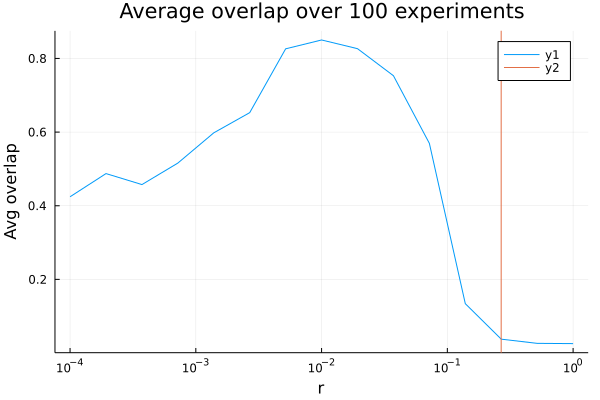

In [29]:
plot_overlap_r(
    overlap_r_vector_houdayer_mixed_100,
    overlap_r_vector_houdayer_mixed_500,
    overlap_r_vector_houdayer_mixed_1000,
    overlap_r_vector_houdayer_mixed_5000,
    range_r_100, d)

savefig("figures/overlap_r_houdayer_mixed.png")

# Comparisons

In [16]:
overlap_metropolis_700 = npzread("data/overlap_hat_metropolis_700.npy")
overlap_houdayer_700 = npzread("data/overlap_time_vector_houdayer_700.npy")
overlap_houdayer_mixed_700 = npzread("data/overlap_hat_houdayer_mixed_700.npy")

plot_comparisons(
    overlap_metropolis_700[1, :],
    overlap_houdayer_700[1, :],
    overlap_houdayer_mixed_700[1, :],
    100
)

savefig("figures/overlap_comparisons_700.png")

# Competition

In [4]:
# Load adjacency matrix
adj = BitMatrix(npzread("A_test.npy"))

100×100 BitMatrix:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  1
 0  0  0  0  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  1  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0 

In [41]:
# Test
x_star = generate_x(2000)
adj = generate_graph(x_star, 5.9, 0.1)

2000×2000 BitMatrix:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     

In [46]:
# Number of nodes in graph
N = size(adj, 1)
a = 5.9
b = 0.1
n0 = 10000

nb_exp = 1
#nb_iter = f(N)
nb_iter = 10_000_000

10000000

In [ ]:
@time begin

    x_hat_matrix = competition(adj, a, b, nb_iter, nb_exp, N, n0)
    
end

In [44]:
overlap(x_hat_matrix[:, 1], x_star)

0.897